# Jupyter Notebook - Azure OpenAI Text Embedding Visualization

This Notebook helps to visualize how embeddings work. To use this notebook, enter the values for the config.env file then run the notebook to see how the words in the array below are plotted in a 3D graph. Then modify the words to see how similar or dissimilar they are semantically by where they are plotted in a 3D space.

In [ ]:
# Install required libraries
%pip install openai matplotlib numpy scikit-learn
%pip install ipykernel
%pip install python-dotenv

In [11]:
# Import libraries
from openai import AzureOpenAI
import numpy as np
from dotenv import dotenv_values
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from mpl_toolkits.mplot3d import Axes3D

In [12]:
# specify the name of the .env file name 
env_name = "my-config.env"  #"config.env"
config = dotenv_values(env_name)

# OpenAI configuration
OPENAI_API_ENDPOINT = config['openai_endpoint']
OPENAI_API_VERSION = config['openai_api_version'] # at the time of authoring, the api version is 2024-02-01
OPENAI_KEY = config['openai_key']
EMBEDDING_MODEL = config['openai_embeddings_model']
EMBEDDING_MODEL_DEPLOYMENT = config['openai_embeddings_deployment']
EMBEDDING_DIMENSIONS = int(config['openai_embeddings_dimensions'])

# Configure Azure OpenAI client
AOAI_client = AzureOpenAI(
    azure_endpoint = OPENAI_API_ENDPOINT, 
    api_version = OPENAI_API_VERSION,
    api_key = OPENAI_KEY
    )

# Function to generate embeddings
def get_embedding(text: str) -> np.ndarray:
    """
    Fetch embeddings for a given text from Azure OpenAI API.
    """
    try:
        response = AOAI_client.embeddings.create(
            input = text, 
            dimensions = EMBEDDING_DIMENSIONS,
            model = EMBEDDING_MODEL_DEPLOYMENT)
        
        embeddings = response.model_dump()
        
        return np.array(embeddings['data'][0]['embedding'])
    
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return None


# 3D Scatter Plot
def plot_embeddings_3d(embeddings_3d, labels):
    """
    Plots embeddings in a 3D scatter plot.
    """
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    for i, label in enumerate(labels):
        x, y, z = embeddings_3d[i]
        ax.scatter(x, y, z, label=label)
        ax.text(x, y, z, label, fontsize=10)

    ax.set_title("3D Visualization of Similar Words Embeddings")
    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")
    ax.set_zlabel("PCA3")
    ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Words")  # Adjust position
    plt.tight_layout()
    plt.show()


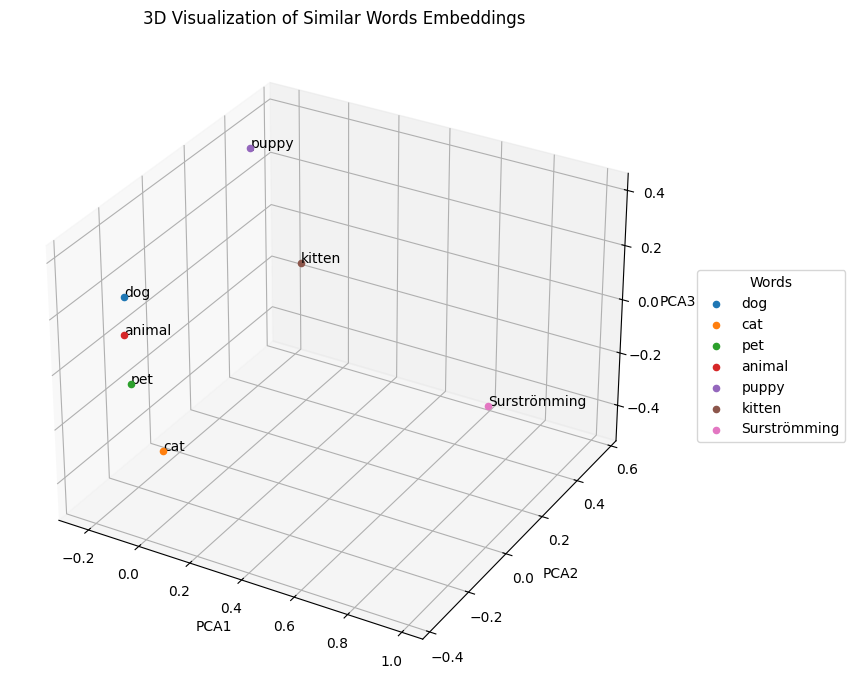

In [13]:
# Array of similar or dissimilar words
texts = [
    "dog", "cat", "pet", "animal", "puppy", "kitten", "Surströmming"
]

# Generate embeddings for texts
embeddings = []
for text in texts:
    embedding = get_embedding(text)
    if embedding is not None:
        embeddings.append(embedding)

embeddings = np.array(embeddings)

# Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Plot the embeddings in 3D
plot_embeddings_3d(embeddings_3d, texts)